<a href="https://colab.research.google.com/github/AbbasHussain72/Wavelet-featre-extraction-/blob/main/current_wavelet_Transform_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.widgets import SpanSelector
import glob
import os
import re

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
!wget https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf 

font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Sans-serif ')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#read csv to append the data and reset index
path = '/content/drive/MyDrive/goodbaddatanewbalanced.csv'
masterdata = pd.read_csv(path,sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [21]:
df = masterdata

# Data Analysis

In [ ]:
#To take interested data
# df = masterdata[(masterdata['Tool'] == 'OP01') | (masterdata['Tool'] == 'OP02')| (masterdata['Tool'] == 'OP04')| (masterdata['Tool'] == 'OP07')| (masterdata['Tool'] == 'OP10')]

In [ ]:
#Function for balancing the data according to condition, tool and machine
# def balance(df,con1,con2,con3):
#   v = []
#   v = df[(df['Tool'] == con1) & (df['Condition'] == con2)& (df['Machine'] == con3)].index
#   f = df[(df['Tool'] == 'OP02') & (df['Condition'] == 'bad') & (df['Machine'] == 'M01')].index


#   # h = df[(df['Tool'] == 'con1') & (df['Condition'] == 'con2')].shape
#   bb = abs(len(v)- len(f))
#   v = v[0:bb]
#   new = df.loc[df.index.drop(v)]

#   return new

In [ ]:
# df = balance(df,'OP02','good','M01')


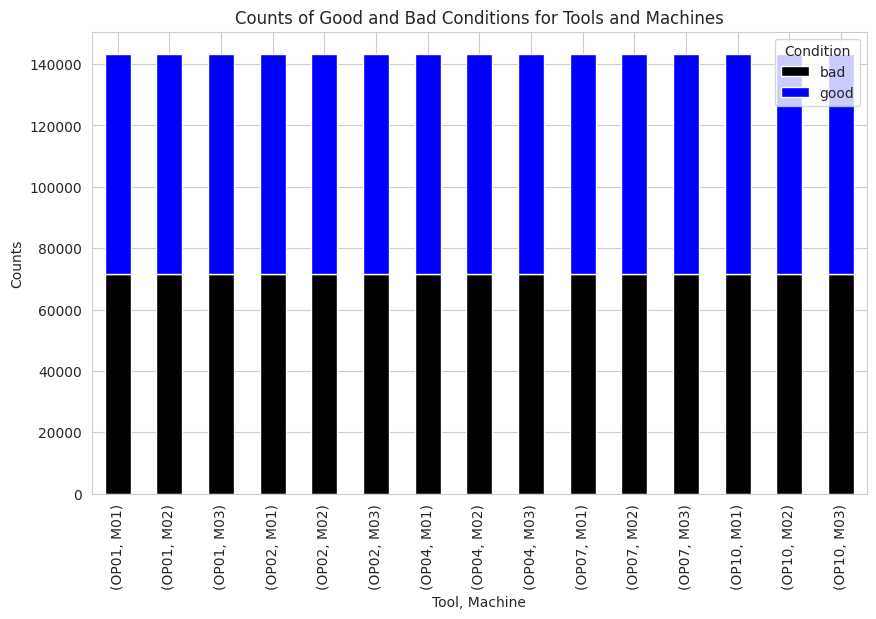

In [ ]:
# Grouped the data for bar plot
grouped = df.groupby(['Tool', 'Machine', 'Condition']).size().reset_index(name='counts')

# Pivot the data to create a stacked bar plot
pivot = grouped.pivot_table(index=['Tool', 'Machine'], columns='Condition', values='counts', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
colors = {'good': 'blue', 'bad': 'black'}
ax = pivot.plot.bar(stacked=True, color=[colors[c] for c in pivot.columns], figsize=(10, 6))

# Set the labels for the axes and the title
ax.set_xlabel('Tool, Machine')
ax.set_ylabel('Counts')
ax.set_title('Counts of Good and Bad Conditions for Tools and Machines')

# Show the plot
plt.show()


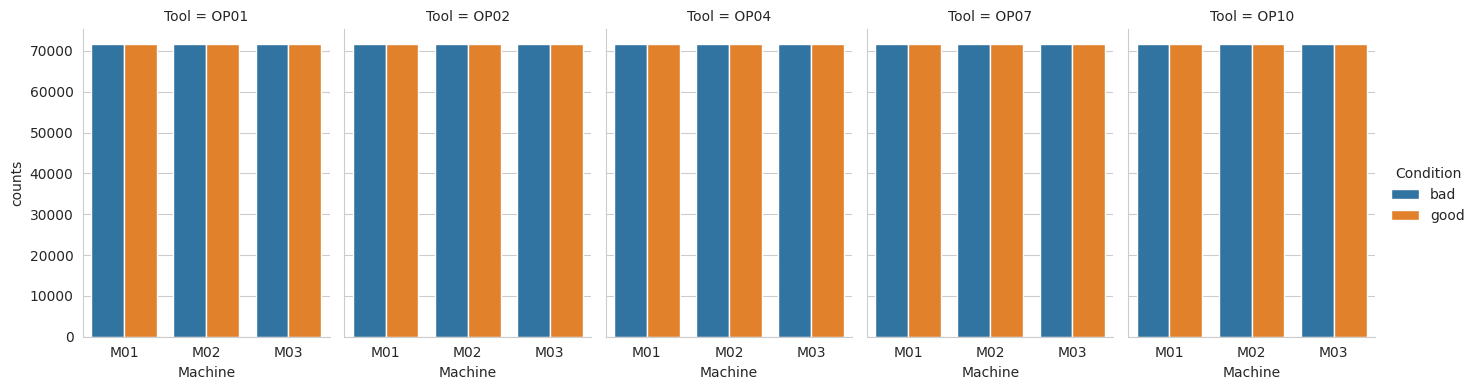

In [ ]:
import seaborn as sns
# Create a grouped bar chart
sns.catplot(x="Machine", y="counts", hue="Condition", col="Tool", data=grouped, kind="bar", height=4, aspect=.7)


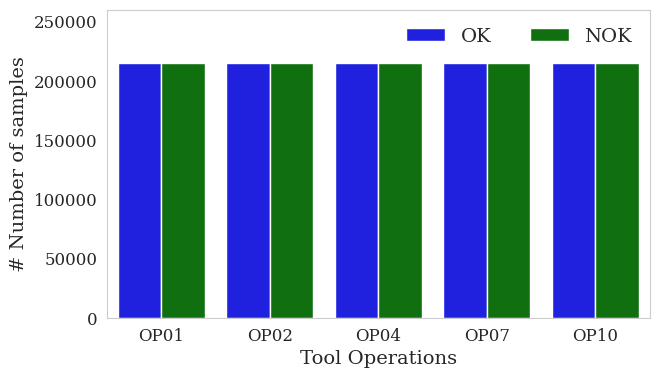

In [ ]:
#plotting the data
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
sns.set_style('whitegrid')
plt.figure(figsize = (7, 4),facecolor=(1, 1, 1))
# Use your new font on all your plots.
plt.rc('font', family='serif ')
#plot
sns.countplot(x = 'Tool',hue = 'Condition',data = df,palette=['blue', 'green'])
#plt.title('Number of samples', fontsize=16)
plt.xlabel('Tool Operations', fontsize=14)
plt.ylabel('# Number of samples', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

# Set the limits of the x and y axes
#plt.xlim(left=-0.5, right=2.5)
plt.ylim(bottom=0, top=260000)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Modify the labels
labels[0] = 'OK'
labels[1] = 'NOK'
# labels[2] = 'M03'

# Create a new legend with the modified labels
plt.legend(handles, labels, fontsize = 14,ncol=3,edgecolor='None')


# plt.savefig('databar_machine.tiff', dpi=300, bbox_inches="tight")
# plt.close()
plt.show()


In [ ]:
#Plotting the time series data sample
ff = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good') & (masterdata['Repeat'] == 4)]
ff = ff.reset_index(drop = True)

In [ ]:
# subtracting the value to get zero starting value
ff.loc[:, 'Time (s)'] = ff['Time (s)'] - 4.9440
ff = ff.copy()

In [ ]:
# plt.rcParams['font.family']

['serif']

In [ ]:
import matplotlib.pyplot as plt
# Create a figure with 3 subplots arranged vertically
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))

# Plot data in each subplot
axs[0].plot(ff['Time (s)'], ff['X'])
axs[1].plot(ff['Time (s)'], ff['Y'])
axs[2].plot(ff['Time (s)'], ff['Z'])

# set the axis limit
axs[0].set_xlim(0,15)
axs[1].set_xlim(0,15)
axs[2].set_xlim(0,15)
axs[0].set_ylim(-2000,2000)
axs[1].set_ylim(-1000,1000)
axs[2].set_ylim(-2000,0)

# set label
axs[0].set_xlabel('Time (sec)', fontsize=14)
axs[0].set_ylabel('X-axis', fontsize=14)
axs[1].set_xlabel('Time (sec)', fontsize=14)
axs[1].set_ylabel('Y-axis', fontsize=14)
axs[2].set_xlabel('Time (sec)', fontsize=14)
axs[2].set_ylabel('Z-axis', fontsize=14)

# set font size of tick labels
axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[2].tick_params(axis='both', labelsize=12)

# remove grid lines from subplot
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

# Set the overall title of the figure
#fig.suptitle('Three subplots', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()

# Save the plot in TIFF format with a resolution of 300 pixels and transparent background
# plt.savefig('plotsample.tiff', dpi=300, format='tiff', transparent=True)

plt.clf()


<Figure size 800x800 with 0 Axes>

In [ ]:
# plt.close()

<Figure size 640x480 with 0 Axes>

In [ ]:
# df.to_csv('goodbaddatanewbalanced.csv', sep='\t') # relative position

# FFT of the signal for decomposition level selection 

In [55]:
#Plotting the time series data sample
# ff = masterdata[(masterdata['Tool'] == 'OP02') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good')]
ff = masterdata[(masterdata['Tool'] == 'OP02') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'bad') & (masterdata['Repeat'] == 0)]
ff = ff.reset_index(drop = True)

In [56]:
ff.Repeat.unique()

array([0])

In [57]:
ff.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z
0,M01,Feb2019,OP02,bad,0,0.0000,27.0,103.0,-1116.0
1,M01,Feb2019,OP02,bad,0,0.0005,29.0,-304.0,-1134.0
2,M01,Feb2019,OP02,bad,0,0.0010,-91.0,-80.0,-964.0
3,M01,Feb2019,OP02,bad,0,0.0015,-97.0,234.0,-954.0
4,M01,Feb2019,OP02,bad,0,0.0020,-17.0,97.0,-1030.0


In [16]:
from scipy.fftpack import fft, ifft
def extract_fft_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    N = len(fft_data)
    n = np.arange(N)
    T = N/sampling_rate
    freq = n/T 
    freqs = np.fft.fftfreq(len(data))
    
    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    peak_ampl = fft_data[peak_coefficient]
    a = abs(peak_freq * sampling_rate)
    b= abs(peak_ampl)
    
    
    
    # all_coefficient = (np.abs(fft_data) > 1000)
    # all_freq = freqs[all_coefficient]
    # all_ampl = fft_data[all_coefficient]
    
    # c = abs(all_freq * sampling_rate)
#     c = list(np.unique(c))
    
    # d = abs(all_ampl)
#     d = list(np.unique(d))
    
#     for i in range(1, (abs (len(a_amp) - len(a_fre)))+1):
#         del d[-i]
    
    return [a,b,N,freq,fft_data,T]


In [58]:
#Signal FFT
from scipy import signal

sr = 2000
x = ff['X'].values
[p_fre,p_amp,N,freq,XX,T]= extract_fft_peak_frequency(x, sr)
# rms_ori = np.sqrt(np.mean(x**2))

# for raw data Get the one-sided specturm -->
n_oneside = N//2
# get the one side frequency -->
f_oneside = freq[:n_oneside]


# sos = signal.butter(2, p_fre, 'hp', fs=sr, output='sos')
# filtered = signal.sosfilt(sos, x)
# rms_filt = np.sqrt(np.mean(filtered**2))
# [f_p_fre,f_p_amp,f_a_fre,f_a_amp,f_N,f_freq,f_X]= extract_fft_peak_frequency(filtered, sr)

# print(p_fre)
# print(p_amp)

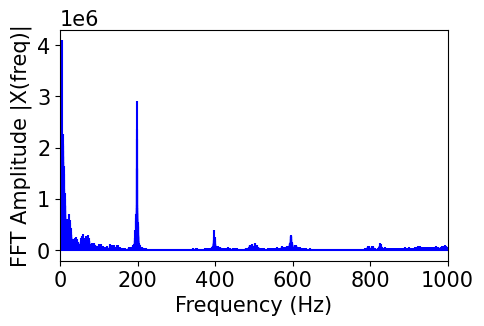

In [59]:
#Ploting
fig = plt.figure(figsize=(5,3),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size':15})
plt.rc('axes', labelsize=15)  
plt.stem(f_oneside, np.abs(XX[:n_oneside]), 'b',markerfmt=" ", basefmt="b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,1000)
# plt.xlim(10,1000)
plt.grid(False)
plt.show()


#ax.legend(loc=1)
# fig.savefig('fft.png', dpi=300, bbox_inches="tight")

# Feature Extraction using Wavelet Packet Analysis

In [5]:
df['Repeat'] = df['Repeat'].astype(str)
df['newcol'] = df['Machine'] +  df['Date'] + df['Tool'] + df['Condition'] + df['Repeat']
df = df.reset_index(drop = True)

In [6]:
df.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z,newcol
0,M01,Aug2019,OP01,bad,0,7.1765,296.0,-111.0,-761.0,M01Aug2019OP01bad0
1,M01,Aug2019,OP01,bad,0,7.1770,58.0,353.0,-704.0,M01Aug2019OP01bad0
2,M01,Aug2019,OP01,bad,0,7.1775,142.0,402.0,-917.0,M01Aug2019OP01bad0
3,M01,Aug2019,OP01,bad,0,7.1780,27.0,253.0,-1171.0,M01Aug2019OP01bad0
4,M01,Aug2019,OP01,bad,0,7.1785,68.0,46.0,-1255.0,M01Aug2019OP01bad0


##  Number of segment for each file

In [7]:
sum1=[]
window_size = 2000
step_size = 1000
for i in df['newcol'].unique():
    print (i)
    master_data =df[(df['newcol'] == i)]
    v = 0
    for j in range(0, master_data.shape[0] - window_size, step_size):
        v = v+1
    print(v)
        #num_segments = np.floor(len(master_data )/1000)
    sum1.append(v)
    #print(num_segments)
print(np.sum(sum1))

M01Aug2019OP01bad0
23
M01Feb2019OP01bad0
46
M01Feb2019OP02bad0
70
M01Feb2019OP04bad0
70
M01Aug2021OP07bad1
33
M01Feb2019OP07bad0
36
M01Feb2019OP10bad2
70
M02Feb2019OP01bad0
24
M02Feb2019OP01bad1
45
M02Feb2019OP02bad1
70
M02Feb2019OP04bad2
70
M02Feb2019OP07bad0
33
M02Feb2019OP07bad1
36
M02Feb2019OP10bad1
70
M03Aug2019OP01bad0
26
M03Feb2021OP01bad0
42
M03Feb2021OP02bad0
70
M03Feb2021OP04bad0
70
M03Aug2021OP07bad0
34
M03Feb2021OP07bad0
34
M03Aug2021OP10bad0
70
M01Feb2021OP01good4
32
M01Feb2021OP01good5
37
M01Feb2021OP02good4
32
M01Feb2021OP02good5
37
M01Feb2021OP04good4
32
M01Feb2021OP04good5
37
M01Feb2021OP07good4
32
M01Feb2021OP07good5
37
M01Feb2021OP10good4
32
M01Feb2021OP10good5
37
M02Feb2021OP01good4
32
M02Feb2021OP01good5
37
M02Feb2021OP02good4
32
M02Feb2021OP02good5
37
M02Feb2021OP04good4
32
M02Feb2021OP04good5
37
M02Feb2021OP07good4
32
M02Feb2021OP07good5
37
M02Feb2021OP10good4
32
M02Feb2021OP10good5
37
M03Feb2021OP01good3
32
M03Feb2021OP01good4
37
M03Feb2021OP02good4
32
M03Feb202

In [ ]:
# def compute_shannon_entropy(signal):
#     return -np.nansum(signal**2 * np.log(signal**2)) # nansum to exclude pesky terms like "0*np.log(0)"

In [8]:
# Function to find the entropy of the signal

from scipy.stats import entropy
from math import log, e
import pandas as pd


def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

## Mother wavelet selection based on Minimum Entropy criteria

In [ ]:
# import collections
 
# from scipy.stats import entropy
  
# def estimate_shannon_entropy(dna_sequence):
#     bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
#     # define distribution
#     dist = [x/sum(bases.values()) for x in bases.values()]
 
#     # use scipy to calculate entropy
#     entropy_value = entropy(dist, base=2)
 
#     return entropy_value



In [ ]:
#len(df['newcol'].unique())

257

In [9]:
wavelet_feature_m = pd.DataFrame() 

In [ ]:
#This is made for the selection of mother wavelet based on minimum entropy criteria
import pywt
data = df
m = 'haar'    #['db1','db2','bior4.4']   'coif1','coif3','sym4','sym2']
w = pywt.Wavelet (m)
level = 2
wavelet_feature_i = pd.DataFrame()
import time
start = time.time()
for i in data['newcol'].unique():
    print(i)
    master_data =data[(data['newcol'] == i)]      
    wavelet_feature = pd.DataFrame()
    wavelet_feature['Date'] = [max(master_data['Date'].values)]
    wavelet_feature['Machine'] = [max(master_data['Machine'])]
    wavelet_feature['Operation'] = [max(master_data['Tool'])]
    wavelet_feature['Condition'] = [max(master_data['Condition'])]
    wavelet_feature['Repeat'] = [max(master_data['Repeat'])]
    wavelet_feature['operationcondition'] =  wavelet_feature['Operation']  + wavelet_feature['Condition']
    wavelet_feature['wavelet'] = [m]
    df1 = pd.DataFrame()
    df1['X'] = master_data['X']
    df1['Y'] = master_data['Y']
    df1['Z'] = master_data['Z']
    colvalue = ['X','Y','Z']
    for val in colvalue:
        data_wave = df1[val].values
        wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
        packet_names = [node.path for node in wp.get_level(level, "natural")]
        for v in range(len(packet_names)):
            new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
            new_wp[packet_names[v]] = wp[packet_names[v]].data
            reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients       
            # Wavelet feature
            wavelet_feature['entropy'+ val + str(v)]  = [entropy2(reconstructed_signal)]# Entropy of reconstructed signal
            wavelet_feature['Energy'+ val + str(v)]  = [np.sum(reconstructed_signal**2)/len(reconstructed_signal)]
            wavelet_feature['Ratio'+ val + str(v)]  = wavelet_feature['Energy'+ val + str(v)] / wavelet_feature['entropy'+ val + str(v)]

    wavelet_feature_i = wavelet_feature_i.append(wavelet_feature)
    wavelet_feature_i = wavelet_feature_i.reset_index(drop = True)



end = time.time()
print(end - start)

In [11]:
wavelet_feature_m = wavelet_feature_m.append(wavelet_feature_i)
wavelet_feature_m = wavelet_feature_m.reset_index(drop = True)

<ipython-input-11-e09351b32d71>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wavelet_feature_m = wavelet_feature_m.append(wavelet_feature_i)


In [14]:
wavelet_feature_m.head(10)

,Date,Machine,Operation,Condition,Repeat,operationcondition,wavelet,entropyX0,EnergyX0,RatioX0,...,RatioZ0,entropyZ1,EnergyZ1,RatioZ1,entropyZ2,EnergyZ2,RatioZ2,entropyZ3,EnergyZ3,RatioZ3
0,Aug2019,M01,OP01,bad,0,OP01bad,haar,7.759969,186346.679360,24013.843587,...,138790.715610,8.460340,15700.511560,1855.777807,8.116226,3320.076638,409.066538,8.209342,4059.907143,494.547184
1,Feb2019,M01,OP01,bad,0,OP01bad,haar,8.041011,200349.245386,24915.928447,...,135731.695669,8.573764,12545.375823,1463.228475,8.264089,2573.359066,311.390515,8.370287,4452.186502,531.903690
2,Feb2019,M01,OP02,bad,0,OP02bad,haar,8.458630,154418.095490,18255.685942,...,132624.926760,8.653040,12210.790234,1411.156175,8.339427,2443.949426,293.059644,8.451842,4555.885253,539.040504
3,Feb2019,M01,OP04,bad,0,OP04bad,haar,8.179088,184422.757377,22548.081979,...,133356.187625,8.907050,20315.792887,2280.866486,8.482192,3827.710279,451.264304,8.597585,5979.319591,695.465026
4,Aug2021,M01,OP07,bad,1,OP07bad,haar,8.580366,245345.392230,28593.815060,...,134036.886794,8.871093,76830.453494,8660.765041,8.725863,13381.707558,1533.568336,8.790936,24561.442471,2793.950831
5,Feb2019,M01,OP07,bad,0,OP07bad,haar,8.253587,202491.011330,24533.697299,...,137571.553142,8.458762,14204.183568,1679.227264,8.159215,2427.463398,297.511879,8.311796,7202.508157,866.540531
6,Feb2019,M01,OP10,bad,2,OP10bad,haar,8.152678,185389.962238,22739.762700,...,132159.653986,9.298848,60790.188204,6537.389156,8.922009,10505.726705,1177.506824,8.973121,12516.336882,1394.869996
7,Feb2019,M02,OP01,bad,0,OP01bad,haar,7.701040,182857.643512,23744.538880,...,144753.656886,8.141301,5358.062421,658.133424,7.841922,1210.776111,154.397877,7.991694,2885.777302,361.097063
8,Feb2019,M02,OP01,bad,1,OP01bad,haar,7.972069,186504.339386,23394.723171,...,141625.664553,8.285848,5539.075760,668.498380,7.957462,1258.399225,158.140785,8.135288,2831.940913,348.105796
9,Feb2019,M02,OP02,bad,1,OP02bad,haar,8.404033,143738.904636,17103.562961,...,135386.198940,8.803927,17437.036113,1980.597448,8.570599,4535.664558,529.212078,8.662042,6171.351109,712.459113


In [ ]:
# #FIND THE MEAN OF ENTROPY
# a = wavelet_feature_m['operationcondition'].unique()
# B = wavelet_feature_m['wavelet'].unique()
# new = pd.DataFrame()
# for i in B:
#     new1 = pd.DataFrame()
#     for n in a:
#         dff = wavelet_feature_m[(wavelet_feature_m['operationcondition'] == n) & (wavelet_feature_m['wavelet'] == i)]
#         d = dff.columns[7:]
#         Avg = dff.mean()
#         new1[d] = [Avg[1:]]
#         new1['operationcondition'] = [max(dff['operationcondition'])]
#         new1['wavelet'] = [max(dff['wavelet'])]
#         new = new.append(new1)
#         new = new.reset_index(drop = True)

C:\Users\AHUSSAIN14\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# new.to_csv('selectionofwavelet.csv', sep='\t') # relative position

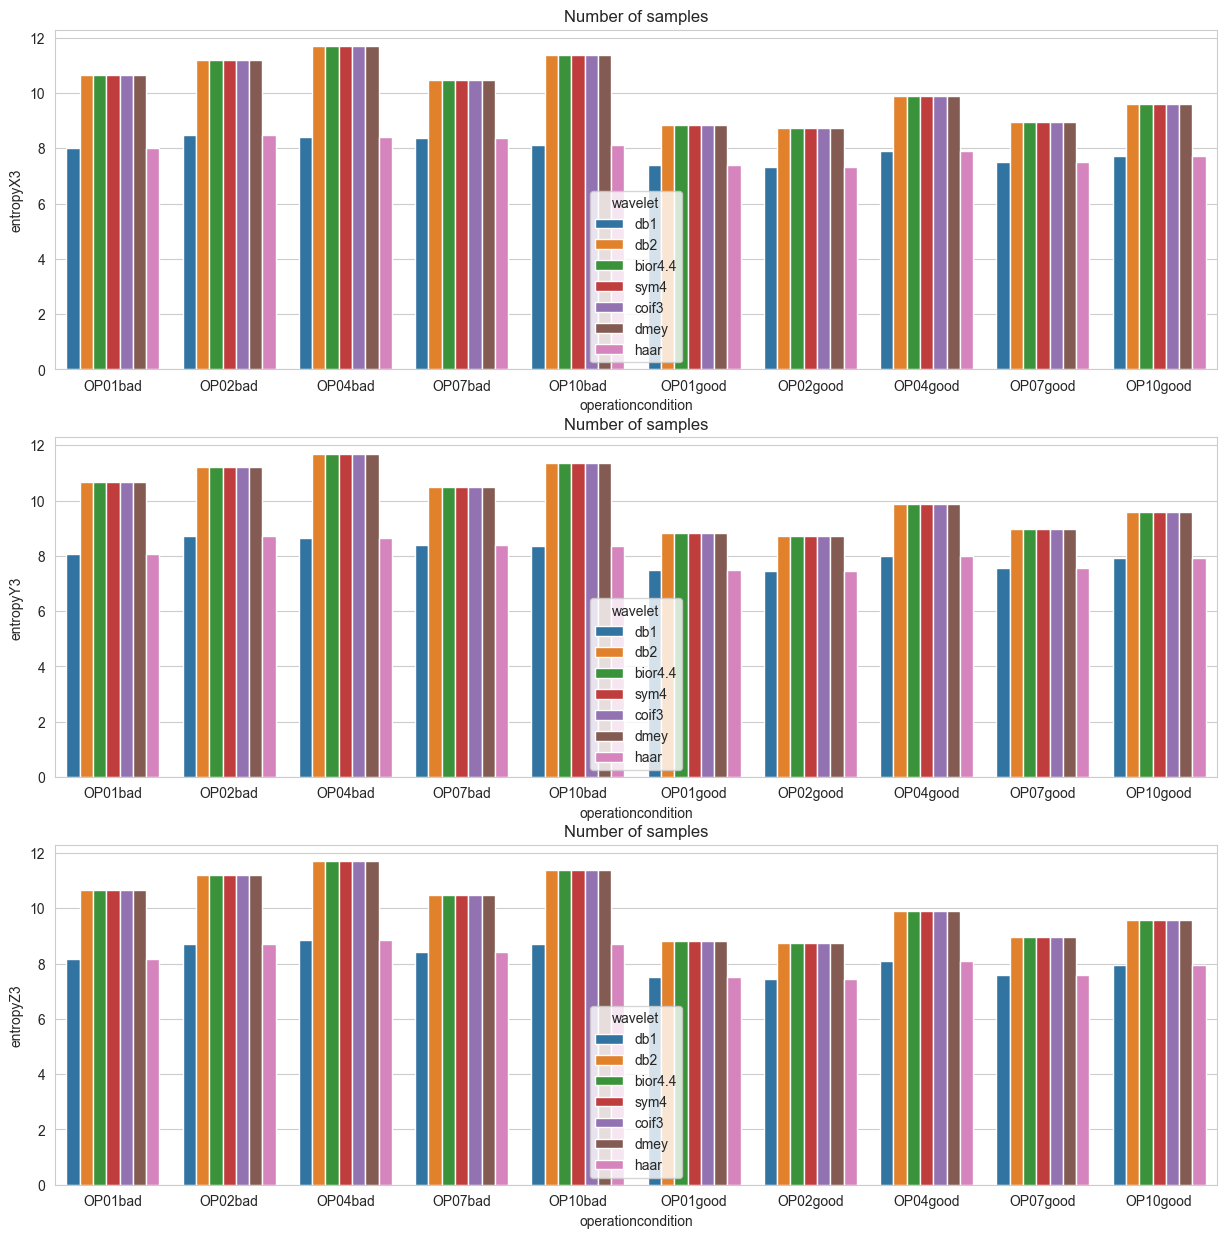

<Figure size 640x480 with 0 Axes>

In [ ]:
# import seaborn as sns
# from scipy import stats
# from scipy.signal import find_peaks
# sns.set_style('whitegrid')
# plt.figure(figsize = (15, 15))
# plt.subplot(3,1,1)
# sns.barplot(data = new, x = 'operationcondition',y = 'entropyX3', hue = 'wavelet')
# plt.title('Number of samples')
# plt.subplot(3,1,2)
# sns.barplot(data = new, x = 'operationcondition',y = 'entropyY3' , hue = 'wavelet')
# plt.title('Number of samples')
# plt.subplot(3,1,3)
# sns.barplot(data = new, x = 'operationcondition',y = 'entropyZ3' , hue = 'wavelet')
# plt.title('Number of samples')
# plt.show()
# plt.clf()

In [ ]:
# q = 'RatioX3'
# # plotdf = new[(new['wavelet'] == 'db1')]
# # print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'db2')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'bior4.4')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'sym4')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'coif3')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'dmey')]
# print(plotdf[q].mean())

592.5642982050135
576.0733602190219
567.3237733083236
563.6747276551814
582.9191034060606


## Wavelet Feature Extraction

In [ ]:
#This will create the data list according to 'newcol'
import pywt
w = pywt.Wavelet ('dmey')
level = 2
wavelet_feature_all = pd.DataFrame() 
#wavelet_feature_test = pd.DataFrame()
data = df
window_size = 2000
step_size = 1000

In [ ]:
data.shape

(2151330, 10)

In [ ]:
b = ['M01Aug2019OP01bad0',
'M01Feb2019OP01bad0',
'M01Feb2019OP02bad0',
'M01Aug2021OP07bad1']
for i in b:
    print(i)

M01Aug2019OP01bad0
M01Feb2019OP01bad0
M01Feb2019OP02bad0
M01Aug2021OP07bad1


In [ ]:
for i in data['newcol'].unique():
# for i in b:
    print(i)
    master_data =data[(data['newcol'] == i)]
    vff = master_data.shape
    print(vff[0])
    wavelet_feature_j = pd.DataFrame()
    
    for j in range(0, master_data.shape[0] - window_size, step_size):
        wavelet_feature = pd.DataFrame()
        df1 = pd.DataFrame()
        df1['X'] = master_data['X'].values[j: j + window_size]
        df1['Y'] = master_data['Y'].values[j: j + window_size]
        df1['Z'] = master_data['Z'].values[j: j + window_size]

        colvalue = ['X','Y','Z']
        wavelet_feature['Date'] = [max(master_data['Date'].values[j: j + window_size])]
        wavelet_feature['Machine'] = [max(master_data['Machine'].values[j: j + window_size])]
        wavelet_feature['Operation'] = [max(master_data['Tool'].values[j: j + window_size])]
        wavelet_feature['Condition'] = [max(master_data['Condition'].values[j: j + window_size])]
        wavelet_feature['Repeat'] = [max(master_data['Repeat'].values[j: j + window_size])]
        wavelet_feature['operationcondition'] =  wavelet_feature['Operation']  + wavelet_feature['Condition']
        
        for val in colvalue:
            data_wave = df1[val].values
            wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
            packet_names = [node.path for node in wp.get_level(level, "natural")]
            for v in range(len(packet_names)):
                new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
                new_wp[packet_names[v]] = wp[packet_names[v]].data
                reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients       
            
                # Wavelet feature
                wavelet_feature['entropy'+ val + str(v)]  = [entropy2(reconstructed_signal,2)]# Entropy of reconstructed signal
                wavelet_feature['max'+ val + str(v)]  = [max(reconstructed_signal)] # max of signal
                wavelet_feature['min'+ val + str(v)]  = [min(reconstructed_signal)]
                wavelet_feature['mean'+ val + str(v)]  = [np.mean(reconstructed_signal)]
                wavelet_feature['std'+ val + str(v)]  = [np.std (reconstructed_signal)]
                wavelet_feature['skew'+ val + str(v)]  = [stats.skew(reconstructed_signal)]
                wavelet_feature['kurtosis'+ val + str(v)]  = [stats.kurtosis(reconstructed_signal)]
                wavelet_feature['Energy'+ val + str(v)]  = [(np.sum(reconstructed_signal**2))/len(reconstructed_signal)]
                
                
        wavelet_feature_j = wavelet_feature_j.append(wavelet_feature)
        # pd.concat([wavelet_feature_j,wavelet_feature])
        wavelet_feature_j = wavelet_feature_j.reset_index(drop = True)
        
    wavelet_feature_all = wavelet_feature_all.append(wavelet_feature_j)
    # pd.concat([wavelet_feature_all,wavelet_feature_j])
    wavelet_feature_all = wavelet_feature_all.reset_index(drop = True)
    
        
        

    

In [ ]:
wavelet_feature_all.shape

In [ ]:
wavelet_feature_all['operationcondition'].value_counts()

In [ ]:
wavelet_feature_all.to_csv('wavelet_feature_all.csv', sep='\t') # relative position

# Feature selection random forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1))
sel.fit(X_train, y_train)

# MODEL = RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
# MODEL.fit(X_train, y_train)
# y_pred = MODEL.predict(X_test)
# # Saving feature names for later use
# feature_list = list(X.columns)
# # Convert to numpy array
# features = np.array(X)

In [ ]:
sel.get_support()

array([False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False, False,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

43

In [ ]:
print(selected_feat)

Index(['maxX0', 'minX0', 'stdX0', 'skewX0', 'kurtosisX0', 'EnergyX0', 'stdX1',
       'kurtosisX1', 'EnergyX1', 'maxX2', 'minX2', 'stdX2', 'kurtosisX2',
       'EnergyX2', 'maxY0', 'minY0', 'meanY0', 'stdY0', 'skewY0', 'kurtosisY0',
       'EnergyY0', 'maxY1', 'minY1', 'stdY1', 'kurtosisY1', 'EnergyY1',
       'maxZ0', 'minZ0', 'stdZ0', 'skewZ0', 'kurtosisZ0', 'maxZ1', 'minZ1',
       'stdZ1', 'skewZ1', 'kurtosisZ1', 'EnergyZ1', 'maxZ2', 'minZ2', 'stdZ2',
       'EnergyZ2', 'stdZ3', 'EnergyZ3'],
      dtype='object')


In [ ]:
#df2 = df[["Courses","Fee","Duration"]] # select multile columns
X_new = wavelet_feature_all[selected_feat]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

OP04bad     157
OP04good    144
OP10bad     117
OP10good    107
OP07bad      71
OP07good     58
OP01bad      58
OP02bad      57
OP02good     48
OP01good     45
Name: operationcondition, dtype: int64 OP04bad     628
OP04good    576
OP10bad     468
OP10good    426
OP07bad     285
OP01bad     232
OP07good    230
OP02bad     228
OP02good    192
OP01good    180
Name: operationcondition, dtype: int64


In [ ]:
MODEL = RandomForestClassifier(bootstrap = True, max_depth= 25,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.9222737819025522

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.93      0.95      0.94        58
    OP01good       0.94      0.73      0.83        45
     OP02bad       0.98      0.98      0.98        57
    OP02good       0.93      0.88      0.90        48
     OP04bad       0.99      0.97      0.98       157
    OP04good       0.83      0.92      0.87       144
     OP07bad       0.98      0.89      0.93        71
    OP07good       0.89      0.93      0.91        58
     OP10bad       0.97      0.97      0.97       117
    OP10good       0.85      0.87      0.86       107

    accuracy                           0.92       862
   macro avg       0.93      0.91      0.92       862
weighted avg       0.93      0.92      0.92       862



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


# Train and Test Data

In [ ]:
wavelet_feature_all.head()

,Date,Machine,Operation,Condition,Repeat,operationcondition,entropyX0,maxX0,minX0,meanX0,...,minZ2,meanZ2,stdZ2,skewZ2,entropyZ3,maxZ3,minZ3,meanZ3,stdZ3,skewZ3
0,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1801.101386,-1402.561931,16.880632,...,-193.071076,-0.003095,29.503719,0.000312,10.965784,188.118255,-192.366201,0.001129,39.308575,-0.030426
1,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1781.163083,-1745.155495,-9.536791,...,-173.472602,-0.001026,29.252570,0.000398,10.965784,202.271345,-202.044404,-0.003277,41.646482,-0.002293
2,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1781.098449,-1745.155495,0.547135,...,-173.472602,0.000540,29.752761,0.000379,10.965784,202.251967,-202.058919,0.009320,42.609385,-0.006876
3,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1743.173360,-1491.697318,10.774369,...,-249.249124,-0.000706,27.743433,0.000025,10.965784,178.925942,-183.094042,0.018576,35.280894,0.005064
4,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1743.173360,-1699.309275,-18.986601,...,-252.261634,-0.004745,28.920070,0.000824,10.965784,179.691133,-173.143189,-0.005987,39.474065,-0.002637


In [ ]:
#Train data = M02 and M03
#Test data = M01
# X_train = wavelet_feature_all.drop(wavelet_feature_all.columns[0:6], axis=1)
# y_train = wavelet_feature_all['operationcondition']
# X_test = wavelet_feature_test.drop(wavelet_feature_test.columns[0:6], axis=1)
# y_test = wavelet_feature_test['operationcondition']
X = wavelet_feature_all.drop(wavelet_feature_all.columns[0:6], axis=1)
Y = wavelet_feature_all['operationcondition']
# print('Training Features Shape:', X_train.shape)
# print('Training Labels Shape:', y_train.shape)
# print('Testing Features Shape:', X_test.shape)
# print('Testing Labels Shape:', y_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

OP01good    42
OP10good    42
OP04bad     42
OP04good    42
OP10bad     42
OP02bad     42
OP02good    41
OP01bad     41
OP07good    41
OP07bad     41
Name: operationcondition, dtype: int64 OP02bad     168
OP04bad     168
OP10bad     168
OP02good    166
OP07good    166
OP01good    165
OP04good    165
OP10good    165
OP07bad     165
OP01bad     165
Name: operationcondition, dtype: int64


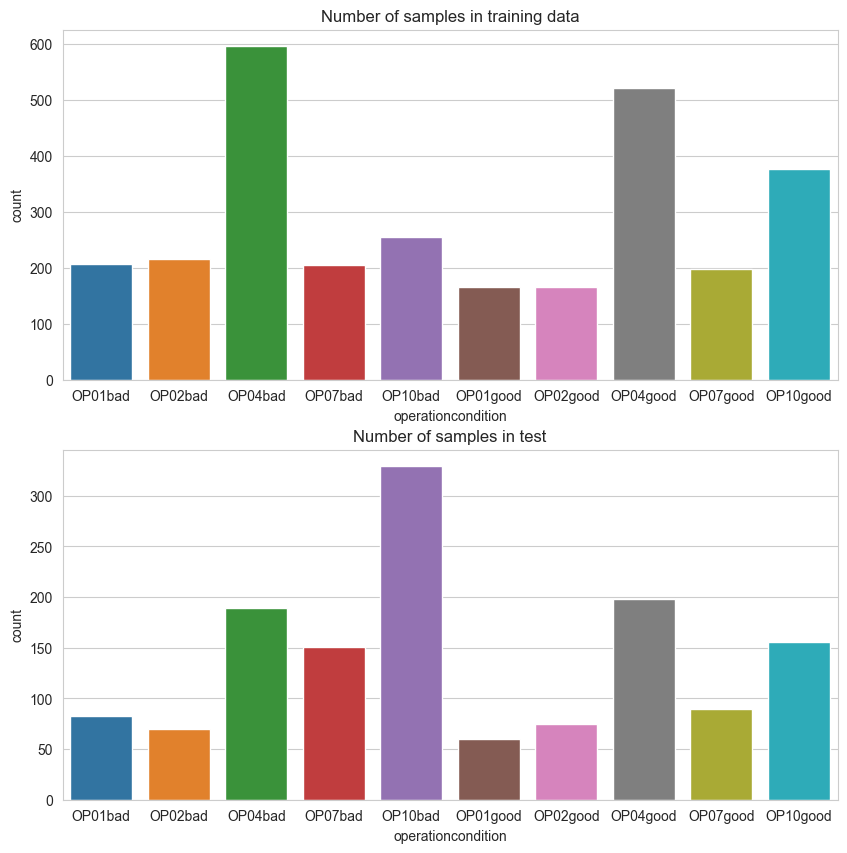

In [ ]:
#checking the number of sample in time domain data
# sns.set_style('whitegrid')
# plt.figure(figsize = (10, 5))
# sns.countplot(x = 'Toolcondition', data = time_feature_all)
# plt.title('Number of samples in timedomain dataset')
# plt.show()
# sns.set_style('whitegrid')
# #plt.figure(figsize = (15, 15))
# plt.figure(figsize = (10, 10))
# plt.subplot(2,1,1)
# sns.countplot(x = 'operationcondition', data = wavelet_feature_all)
# plt.title('Number of samples in training data')
# plt.subplot(2,1,2)
# sns.countplot(x = 'operationcondition', data = wavelet_feature_test)
# plt.title('Number of samples in test')
# plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

MODEL = RandomForestClassifier(bootstrap = True, max_depth= 25,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.9110576923076923

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.93      0.93      0.93        41
    OP01good       0.89      0.93      0.91        42
     OP02bad       0.89      1.00      0.94        42
    OP02good       1.00      0.88      0.94        41
     OP04bad       0.91      0.98      0.94        42
    OP04good       0.88      0.83      0.85        42
     OP07bad       0.95      0.88      0.91        41
    OP07good       0.88      0.90      0.89        41
     OP10bad       0.95      0.90      0.93        42
    OP10good       0.86      0.88      0.87        42

    accuracy                           0.91       416
   macro avg       0.91      0.91      0.91       416
weighted avg       0.91      0.91      0.91       416



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


# SUPPORT VECTOR CLASSIFIER (SVC)

In [ ]:
from sklearn.svm import SVC
MODEL = make_pipeline(StandardScaler(), SVC(kernel='rbf',C=9,gamma='auto'))
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8932714617169374


# Logistic regression model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report


# # standardization
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_data_lr = scaler.transform(X_train)
# X_test_data_lr = scaler.transform(X_test)
# # logistic regression model
# lr = LogisticRegression(random_state = 21)
# lr.fit(X_train_data_lr, y_train)
# y_pred = lr.predict(X_test_data_lr)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\n -------------Classification Report-------------\n")
# print(classification_report(y_test, y_pred))

Accuracy: 0.5802997858672377

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.05      0.01      0.02        83
    OP01good       0.37      0.32      0.34        60
     OP02bad       1.00      0.87      0.93        70
    OP02good       0.82      0.19      0.30        75
     OP04bad       0.41      0.28      0.33       189
    OP04good       0.54      0.70      0.61       198
     OP07bad       0.77      0.55      0.64       151
    OP07good       0.69      0.94      0.79        90
     OP10bad       0.71      0.80      0.75       329
    OP10good       0.36      0.61      0.45       156

    accuracy                           0.58      1401
   macro avg       0.57      0.53      0.52      1401
weighted avg       0.58      0.58      0.56      1401



C:\Users\AHUSSAIN14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# CONFUSION MATRIX

In [ ]:
labels = wavelet_feature_all['operationcondition'].unique()

In [ ]:
from sklearn.metrics import confusion_matrix
test_confu_matrix = confusion_matrix(y_test,  y_pred)

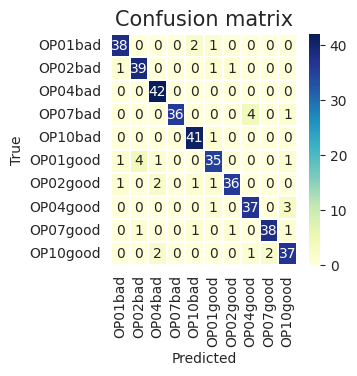

In [ ]:
# confusion matrix
plt.figure(2,figsize=(3,3))
# sns.heatmap(test_confu_matrix, annot = True,
# xticklabels=Labels, yticklabels=Labels, cmap = "Blues")
# plt.title('Test Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()
sns.heatmap(test_confu_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# PCA ANALYSIS

In [ ]:
from sklearn.decomposition import PCA
X = wavelet_feature_all.drop(wavelet_feature_all.columns[0:6], axis=1)
Y = wavelet_feature_all['operationcondition']

x = StandardScaler().fit_transform(X)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
             #, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [ ]:
principalDf.shape


(2077, 20)

In [ ]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.930060,-0.688245,-2.153565,-1.308280,0.313610,0.396531,-3.045707,-1.064774,0.245950,-0.549302,-0.608991,-0.547901,-0.288382,0.648106,-0.143814,-0.453368,-0.592109,0.580814,-0.712282,-0.182888
1,-2.685963,-0.200914,-1.604340,-1.836721,-0.513958,0.301901,0.225619,0.890680,-0.642046,0.658973,0.089194,-1.316611,-0.290828,0.139394,0.484854,0.133404,0.022724,1.530744,-1.405602,0.391016
2,-2.324479,-0.363855,-1.758740,-1.101538,0.088105,0.644681,0.666909,0.307534,-0.746094,1.249985,-0.915881,-2.010563,-0.010594,-1.052656,0.326939,-0.680609,-0.128379,0.513271,-1.265181,0.314612
3,-2.697154,-0.417108,-1.984479,-0.827565,0.713523,0.462437,-0.853710,-1.105849,-0.193249,0.132763,-1.419696,-1.205742,0.827850,-2.037675,0.377945,-0.731499,-1.130804,0.195337,-0.264260,0.322417
4,-6.041502,-0.414321,-2.041770,2.525094,3.784622,1.999601,-1.006888,1.275946,1.052890,-1.636823,1.819605,0.690967,0.286574,0.683398,1.488213,-0.033319,-2.188113,0.893066,0.393398,0.866889


In [ ]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

OP01good    42
OP10good    42
OP04bad     42
OP04good    42
OP10bad     42
OP02bad     42
OP02good    41
OP01bad     41
OP07good    41
OP07bad     41
Name: operationcondition, dtype: int64 OP02bad     168
OP04bad     168
OP10bad     168
OP02good    166
OP07good    166
OP01good    165
OP04good    165
OP10good    165
OP07bad     165
OP01bad     165
Name: operationcondition, dtype: int64


In [ ]:
MODEL = RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.7596153846153846

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.76      0.78      0.77        41
    OP01good       0.63      0.81      0.71        42
     OP02bad       0.91      0.98      0.94        42
    OP02good       0.76      0.76      0.76        41
     OP04bad       0.91      0.71      0.80        42
    OP04good       0.69      0.57      0.62        42
     OP07bad       0.89      0.80      0.85        41
    OP07good       0.79      0.80      0.80        41
     OP10bad       0.76      0.74      0.75        42
    OP10good       0.59      0.64      0.61        42

    accuracy                           0.76       416
   macro avg       0.77      0.76      0.76       416
weighted avg       0.77      0.76      0.76       416



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


# FFT 

In [ ]:
# from scipy.fftpack import fft, ifft
# sr = 2000
# t = df['Time (s)'].values
# x = df['X'].values

# X = fft(x)
# N = len(X)
# n = np.arange(N)
# T = N/sr
# freq = n/T 

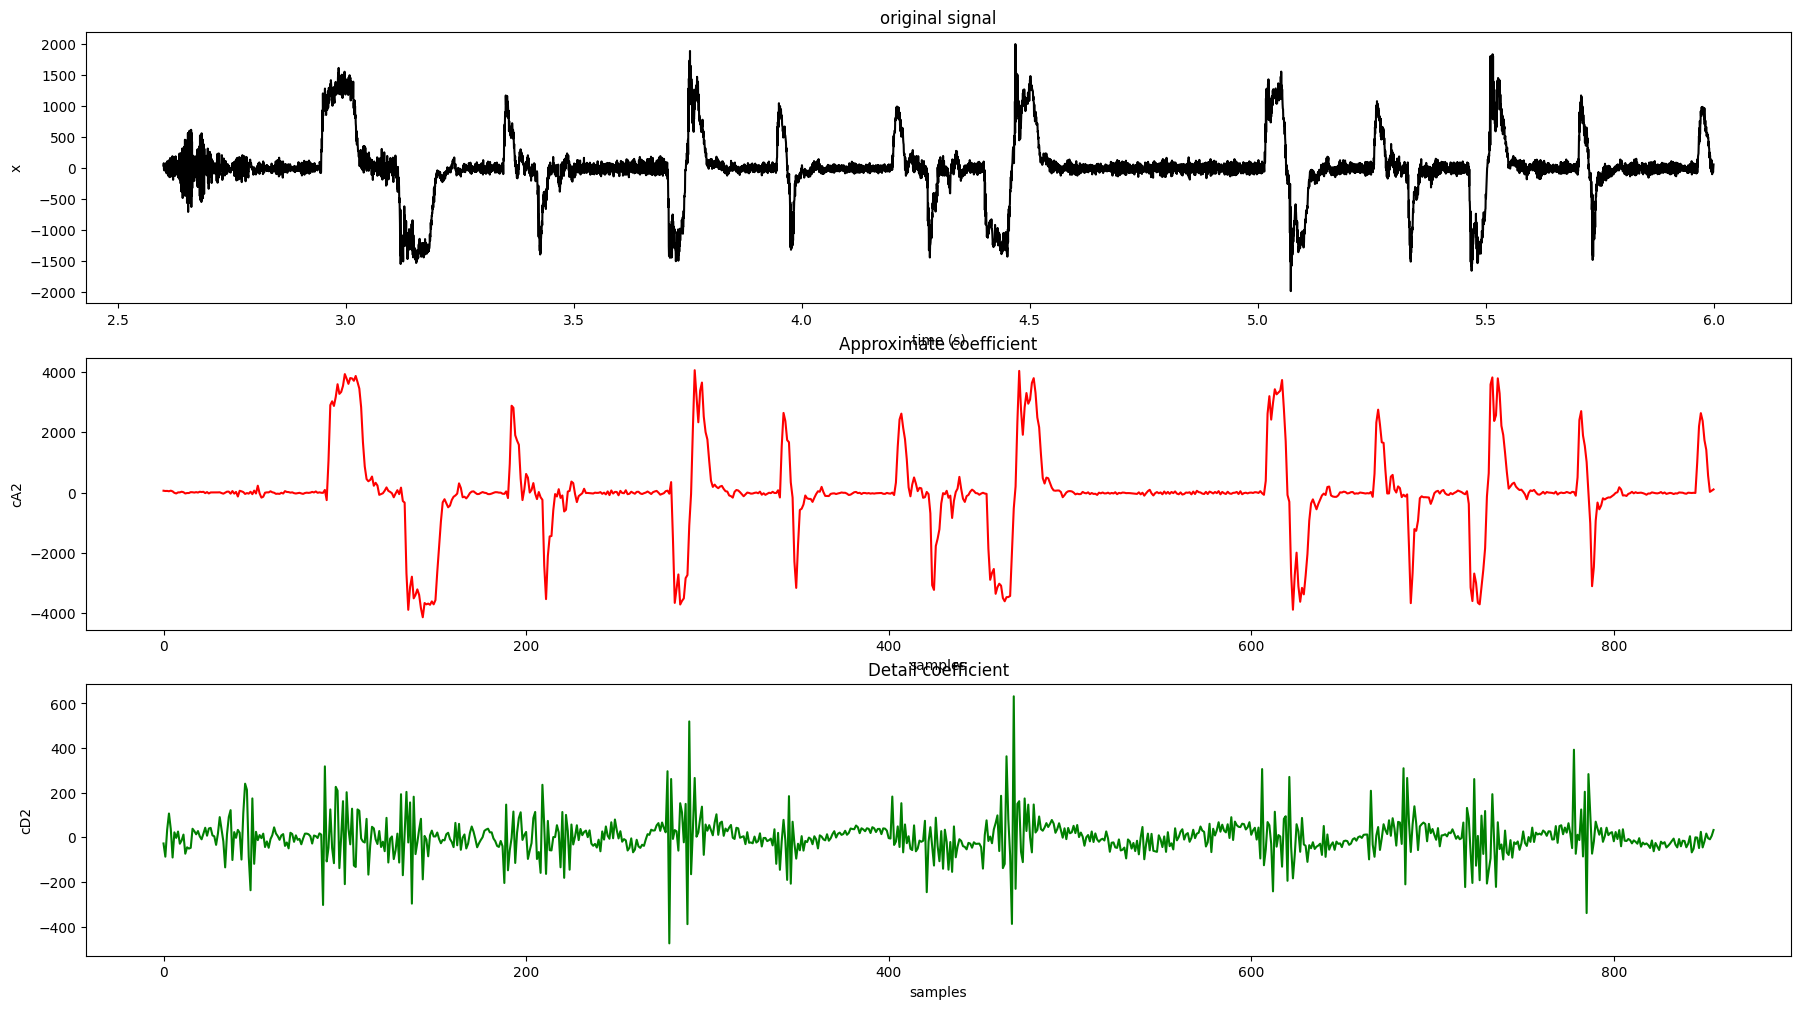

In [ ]:
#Ploting the signals
# plt.figure(figsize = (22, 12))
# plt.subplot(3,1,1)
# plt.plot(t, x, 'k',)
# plt.xlabel('time (s)')
# plt.ylabel('x')
# plt.title ('original signal')
# plt.xlim(0, 10)

# plt.subplot(3,1,2)
# plt.plot(coeffs[0], 'r')
# plt.xlabel('samples')
# plt.ylabel('cA2')
# plt.title ('Approximate coefficient')

# plt.subplot(3,1,3)
# plt.plot(coeffs[1], 'g')
# plt.xlabel('samples')
# plt.ylabel('cD2')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,4)
# plt.plot(coeff3, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,5)
# plt.plot(coeff4, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,6)
# plt.plot(coeff5, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,7)
# plt.plot(coeff6, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,8)
# plt.plot(coeff7, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,9)
# plt.plot(coeff8, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(3,1,3)
# plt.plot(t,y[0:6799], 'g')
# plt.xlabel('time')
# plt.ylabel('value')
# plt.title ('reconstructed signal')

# plt.show()